# Linear Regression
Implementing Linear Regression for predicting profit of a food truck given the population and profits of different cities


In [238]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [239]:
#in dataset both the column has values in multiple of 10k
df=pd.read_csv('Data1.txt')
df.head(5)

,6.1101,17.592
0,5.5277,9.1302
1,8.5186,13.6620
2,7.0032,11.8540
3,5.8598,6.8233
4,8.3829,11.8860


### Reading the dataset

In [240]:
#load dataset
print(df.shape)
print(df.columns)
df.columns=['x','y']
print(df.columns)


(96, 2)
Index(['6.1101', '17.592'], dtype='object')
Index(['x', 'y'], dtype='object')


In [241]:
#describe the dataframe
df.describe()

,x,y
count,96.000000,96.000000
mean,8.181151,5.716709
std,3.884451,5.404947
min,5.026900,-2.680700
25%,5.690950,1.952550
50%,6.735950,4.455300
75%,8.639925,6.879150
max,22.203000,24.147000


### Scatter plot of Population vs Profit

In [242]:
#plot

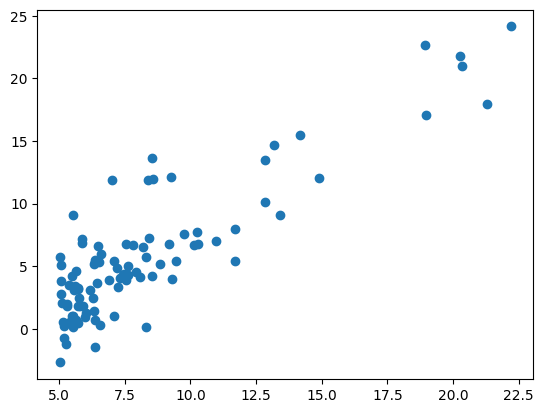

In [243]:
plt.scatter(df['x'],df['y'])

### Function to compute the cost function

In [244]:
### Function to compute the cost function

In [245]:
def computeCost(X, y, theta):
    inner_product = np.power(((X * theta.T) - y) , 2)
    return np.sum(inner_product) / (2 * len(X))

### Appending 1s to the front of the dataset

In [246]:
#insert column with 1s
df['1']=1
df

,x,y,1
0,5.5277,9.13020,1
1,8.5186,13.66200,1
2,7.0032,11.85400,1
3,5.8598,6.82330,1
4,8.3829,11.88600,1
...,...,...,...
91,5.8707,7.20290,1
92,5.3054,1.98690,1
93,8.2934,0.14454,1
94,13.3940,9.05510,1


### Set training data (X) and target variable (y)

In [247]:
train_df, test_df = train_test_split(df, test_size=0.2, random_state=2)

In [248]:
x=train_df['x']
y=train_df['y']
xt=test_df['x']
yt=test_df['y']

### Converting dataframe to numpy matrices and creating a parameter (theta) matrix

In [249]:
#converting X,y into numpy matrix
X=np.array(x).reshape(-1,1)
Y=np.array(y).reshape(-1,1)
XT=np.array(xt).reshape(-1,1)
YT=np.array(yt).reshape(-1,1)

In [259]:
#converting theta into numpy matrix
theta = np.zeros((len(X),2))
# take initial values as [0,0] for theta

### Function to perform gradient descent on parameters theta by repeatedly updating the parameters

In [251]:
def gradientDescent(X, y, theta, alpha, iters):
    temp = np.matrix(np.zeros(theta.shape))
    parameters = theta.shape[1]  # Number of features
    cost = np.zeros(iters)

    for i in range(iters):
        err = (X * theta.T) - y  # Update this line
        for j in range(parameters):
            term = np.multiply(err, X[:, j])
            temp[0, j] = theta[0, j] - ((alpha / len(X)) * np.sum(term))
        
        theta = temp
        cost[i] = computeCost(X, y, theta)

    return theta, cost


### Set values for learning rate and number of iterations
- alpha here denotes the learning rate that helps to determine how quickly the algorithm
    will converge to the optimal solution
- iters denotes the number of iterations

In [252]:
# take alpha 0.01
alpha=0.01
# iters=1000
iters=1000
# theta,cost=gradientDescent(X,Y,theta,alpha,iters)

SCIKIT LEARN IMPLEMENTATION

-Implement various type of errors,
 eg.Mean squared error,R_squared_score
choose best for the evaluting model,
and justify why it is best


In [253]:
#fit the model
reg=LinearRegression()
reg.fit(X,Y)
print(reg.score(XT,YT))

0.7128028494220464


### Using Matplotlib library to visualize our solution using scatter plot

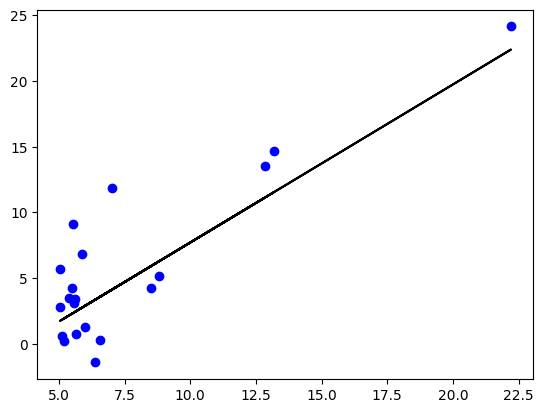

In [254]:
#predict the target values
y_pred = reg.predict(XT)
plt.scatter(XT,YT, color ='b')
plt.plot(XT, y_pred, color ='k')

In [260]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(YT, y_pred)
mse = mean_squared_error(YT, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(YT, y_pred)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R2): {r2}')

Mean Absolute Error (MAE): 2.6599597715381114
Mean Squared Error (MSE): 10.676990860102077
Root Mean Squared Error (RMSE): 3.2675665043120508
R-squared (R2): 0.7128028494220464


yee yee ahh model